<a href="https://colab.research.google.com/github/MLUISG/Projects/blob/main/Mark_Guereque_Project_3_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 3 

In [ ]:
import pandas as pd
import sqlite3 as db
import matplotlib.pyplot as plt

In [ ]:
%%capture
%%bash
apt-get update
apt-get install -y sqlite3 wamerican-insane uuid

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Project Data Set
For this project I used the Chinook Data Set with SQLite 3.



In [ ]:
%%bash
curl -s -O https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip
unzip -l chinook.zip


Archive:  chinook.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
   884736  2015-11-29 10:53   chinook.db
---------                     -------
   884736                     1 file


In [ ]:
!unzip chinook.zip


Archive:  chinook.zip
replace chinook.db? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


I'm going to look at the tables and schema to better understand how to navigate through my data set.

# My Data questions
* What sort of information is in this dataset?
* What data is stored in playlists?
* What does kind of data is in invoice?
* Who is the largest customer?




##Initial Data Analysis

In [ ]:
%%script sqlite3 --column --header chinook.db
.tables

albums          employees       invoices        playlists     
artists         genres          media_types     tracks        
customers       invoice_items   playlist_track


In [ ]:
%%script sqlite3 --column --header chinook.db
.schema


CREATE TABLE IF NOT EXISTS "albums"
(
    [AlbumId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Title] NVARCHAR(160)  NOT NULL,
    [ArtistId] INTEGER  NOT NULL,
    FOREIGN KEY ([ArtistId]) REFERENCES "artists" ([ArtistId]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
);
CREATE TABLE sqlite_sequence(name,seq);
CREATE TABLE IF NOT EXISTS "artists"
(
    [ArtistId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Name] NVARCHAR(120)
);
CREATE TABLE IF NOT EXISTS "customers"
(
    [CustomerId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [FirstName] NVARCHAR(40)  NOT NULL,
    [LastName] NVARCHAR(20)  NOT NULL,
    [Company] NVARCHAR(80),
    [Address] NVARCHAR(70),
    [City] NVARCHAR(40),
    [State] NVARCHAR(40),
    [Country] NVARCHAR(40),
    [PostalCode] NVARCHAR(10),
    [Phone] NVARCHAR(24),
    [Fax] NVARCHAR(24),
    [Email] NVARCHAR(60)  NOT NULL,
    [SupportRepId] INTEGER,
    FOREIGN KEY ([SupportRepId]) REFERENCES "employees" ([EmployeeId]) 
		ON DELETE NO ACTION ON 

It looks like Chinook is a company that sells music to customers around the world.

## Playlist Info


In [ ]:
%%script sqlite3 --column --header chinook.db
select *
from playlists 
limit 10

PlaylistId  Name      
----------  ----------
1           Music     
2           Movies    
3           TV Shows  
4           Audiobooks
5           90’s Music
6           Audiobooks
7           Movies    
8           Music     
9           Music Vide
10          TV Shows  


In [ ]:
%%script sqlite3 --column --header chinook.db
select 
count(*)
from playlists

count(*)  
----------
18        


In [ ]:
%%script sqlite3 --column --header chinook.db
select *
from playlists 

PlaylistId  Name      
----------  ----------
1           Music     
2           Movies    
3           TV Shows  
4           Audiobooks
5           90’s Music
6           Audiobooks
7           Movies    
8           Music     
9           Music Vide
10          TV Shows  
11          Brazilian 
12          Classical 
13          Classical 
14          Classical 
15          Classical 
16          Grunge    
17          Heavy Meta
18          On-The-Go 


I first pulled just the first 10 items in playlists to get a general overlook. After that I did a count and saw it's only 18 items so I pulled the rest.

In [ ]:
%%script sqlite3 --column --header chinook.db
select PlaylistId,
count(*)
from playlist_track
group by PlaylistId

PlaylistId  count(*)  
----------  ----------
1           3290      
3           213       
5           1477      
8           3290      
9           1         
10          213       
11          39        
12          75        
13          25        
14          25        
15          25        
16          15        
17          26        
18          1         


In [ ]:
%%script sqlite3 --column --header chinook.db
select *
from playlist_track
where PlaylistId = 13

PlaylistId  TrackId   
----------  ----------
13          3479      
13          3480      
13          3481      
13          3482      
13          3483      
13          3484      
13          3485      
13          3486      
13          3487      
13          3488      
13          3489      
13          3490      
13          3491      
13          3492      
13          3493      
13          3494      
13          3495      
13          3496      
13          3497      
13          3498      
13          3499      
13          3500      
13          3501      
13          3502      
13          3503      


In [ ]:
%%script sqlite3 --column --header chinook.db
select *
from tracks
where TrackId = 3479

TrackId     Name                         AlbumId     MediaTypeId  GenreId     Composer              Milliseconds  Bytes       UnitPrice 
----------  ---------------------------  ----------  -----------  ----------  --------------------  ------------  ----------  ----------
3479        Prometheus Overture, Op. 43  324         4            24          Ludwig van Beethoven  339567        10887931    0.99      


In [ ]:
%%script sqlite3 --column --header chinook.db
with Tracks_info as(
select *
from tracks
where TrackId = 3479
),
Class_13 as(
  select *
from playlist_track
where PlaylistId = 13
)
select *
from Class_13 as c
join Tracks_info as t
where c.TrackId = t.TrackId


PlaylistId  TrackId     TrackId     Name                         AlbumId     MediaTypeId  GenreId     Composer              Milliseconds  Bytes       UnitPrice 
----------  ----------  ----------  ---------------------------  ----------  -----------  ----------  --------------------  ------------  ----------  ----------
13          3479        3479        Prometheus Overture, Op. 43  324         4            24          Ludwig van Beethoven  339567        10887931    0.99      


In [ ]:
%%script sqlite3 --column --header chinook.db
with Tracks_info as(
select *
from tracks
),
Class_13 as(
  select *
from playlist_track
where PlaylistId = 13
)
select *
from Class_13 as c
join Tracks_info as t
where c.TrackId = t.TrackId


PlaylistId  TrackId     TrackId     Name                         AlbumId     MediaTypeId  GenreId     Composer              Milliseconds  Bytes       UnitPrice 
----------  ----------  ----------  ---------------------------  ----------  -----------  ----------  --------------------  ------------  ----------  ----------
13          3479        3479        Prometheus Overture, Op. 43  324         4            24          Ludwig van Beethoven  339567        10887931    0.99      
13          3480        3480        Sonata for Solo Violin: IV:  325         4            24          Béla Bartók           299350        9785346     0.99      
13          3481        3481        A Midsummer Night's Dream,   326         2            24                                387826        6497867     0.99      
13          3482        3482        Suite No. 3 in D, BWV 1068:  327         2            24          Johann Sebastian Bac  225933        3847164     0.99      
13          3483        3483      

In [ ]:
%%script sqlite3 --column --header chinook.db
select *
from playlists 

PlaylistId  Name      
----------  ----------
1           Music     
2           Movies    
3           TV Shows  
4           Audiobooks
5           90’s Music
6           Audiobooks
7           Movies    
8           Music     
9           Music Vide
10          TV Shows  
11          Brazilian 
12          Classical 
13          Classical 
14          Classical 
15          Classical 
16          Grunge    
17          Heavy Meta
18          On-The-Go 


In [ ]:
%%script sqlite3 --column --header chinook.db
select Name,
PlaylistID between 12 and 15
from playlists 

Name        PlaylistID between 12 and 15
----------  ----------------------------
Music       0                           
Movies      0                           
TV Shows    0                           
Audiobooks  0                           
90’s Music  0                           
Audiobooks  0                           
Movies      0                           
Music       0                           
Music Vide  0                           
TV Shows    0                           
Brazilian   0                           
Classical   1                           
Classical   1                           
Classical   1                           
Classical   1                           
Grunge      0                           
Heavy Meta  0                           
On-The-Go   0                           


In [ ]:
%%script sqlite3 --column --header chinook.db
with Movies_and_Music as(
select * 
from playlists
where Name = 'Movies' or Name = 'Music'
)
select *
from Movies_and_Music

PlaylistId  Name      
----------  ----------
1           Music     
2           Movies    
7           Movies    
8           Music     


In [ ]:
%%script sqlite3 --header chinook.db
with Tracks_info as(
select *
from tracks
),
Class_13 as(
  select *
from playlist_track
where PlaylistId in (12,13,14,15)
),
Play_Class as(
  select *
  from playlists
  where PlaylistId in (12,13,14,15)
),
Combo as(
select *
from Class_13 as c
join Tracks_info as t
where c.TrackId = t.TrackId
),
Class_all as(
select *
from Play_Class join Combo
where Play_Class.PlaylistID = Combo.PlaylistId
)
select 
count(distinct `Name:1`)
from Class_all


count(distinct `Name:1`)
75


In [ ]:
%%script sqlite3 --header chinook.db
with Tracks_info as(
select *
from tracks
),
Class_13 as(
  select *
from playlist_track
where PlaylistId in (12,13,14,15)
),
Play_Class as(
  select *
  from playlists
  where PlaylistId in (12,13,14,15)
),
Combo as(
select *
from Class_13 as c
join Tracks_info as t
where c.TrackId = t.TrackId
),
Class_all as(
select *
from Play_Class join Combo
where Play_Class.PlaylistID = Combo.PlaylistId
)
select *
from Class_all


PlaylistId|Name|PlaylistId:1|TrackId|TrackId:1|Name:1|AlbumId|MediaTypeId|GenreId|Composer|Milliseconds|Bytes|UnitPrice
12|Classical|12|3403|3403|Intoitus: Adorate Deum|272|2|24|Anonymous|245317|4123531|0.99
12|Classical|12|3404|3404|Miserere mei, Deus|273|2|24|Gregorio Allegri|501503|8285941|0.99
12|Classical|12|3405|3405|Canon and Gigue in D Major: I. Canon|274|2|24|Johann Pachelbel|271788|4438393|0.99
12|Classical|12|3406|3406|Concerto No. 1 in E Major, RV 269 "Spring": I. Allegro|275|2|24|Antonio Vivaldi|199086|3347810|0.99
12|Classical|12|3407|3407|Concerto for 2 Violins in D Minor, BWV 1043: I. Vivace|276|2|24|Johann Sebastian Bach|193722|3192890|0.99
12|Classical|12|3408|3408|Aria Mit 30 Veränderungen, BWV 988 "Goldberg Variations": Aria|277|2|24|Johann Sebastian Bach|120463|2081895|0.99
12|Classical|12|3409|3409|Suite for Solo Cello No. 1 in G Major, BWV 1007: I. Prélude|278|2|24|Johann Sebastian Bach|143288|2315495|0.99
12|Classical|12|3410|3410|The Messiah: Behold, I Tell You

Now I'm going to look at invoice data.

In [ ]:
%%script sqlite3 --column --header chinook.db
select *
from invoices 
limit 10

InvoiceId   CustomerId  InvoiceDate          BillingAddress           BillingCity  BillingState  BillingCountry  BillingPostalCode  Total     
----------  ----------  -------------------  -----------------------  -----------  ------------  --------------  -----------------  ----------
1           2           2009-01-01 00:00:00  Theodor-Heuss-Straße 34  Stuttgart                  Germany         70174              1.98      
2           4           2009-01-02 00:00:00  Ullevålsveien 14         Oslo                       Norway          0171               3.96      
3           8           2009-01-03 00:00:00  Grétrystraat 63          Brussels                   Belgium         1000               5.94      
4           14          2009-01-06 00:00:00  8210 111 ST NW           Edmonton     AB            Canada          T6G 2C7            8.91      
5           23          2009-01-11 00:00:00  69 Salem Street          Boston       MA            USA             2113               13.86     

In [ ]:
%%script sqlite3 --column --header chinook.db
select *
from invoice_items
limit 10

InvoiceLineId  InvoiceId   TrackId     UnitPrice   Quantity  
-------------  ----------  ----------  ----------  ----------
1              1           2           0.99        1         
2              1           4           0.99        1         
3              2           6           0.99        1         
4              2           8           0.99        1         
5              2           10          0.99        1         
6              2           12          0.99        1         
7              3           16          0.99        1         
8              3           20          0.99        1         
9              3           24          0.99        1         
10             3           28          0.99        1         


In [ ]:
%%script sqlite3 --column --header chinook.db
select 
count(*)
from invoices

count(*)  
----------
412       


In [ ]:
%%script sqlite3 --column --header chinook.db
select min(Total)
from invoices

min(Total)
----------
0.99      


In [ ]:
%%script sqlite3 --column --header chinook.db
select avg(Total)
from invoices

avg(Total)      
----------------
5.65194174757282


In [ ]:
%%script sqlite3 --column --header chinook.db
select max(Total)
from invoices

max(Total)
----------
25.86     


In [ ]:
%%script sqlite3 --column --header chinook.db
select *
from invoices
where Total = 25.86

InvoiceId   CustomerId  InvoiceDate          BillingAddress  BillingCity  BillingState  BillingCountry  BillingPostalCode  Total     
----------  ----------  -------------------  --------------  -----------  ------------  --------------  -----------------  ----------
404         6           2013-11-13 00:00:00  Rilská 3174/6   Prague                     Czech Republic  14300              25.86     


In [ ]:
%%script sqlite3 --column --header chinook.db
select BillingCountry,
max(Total)
from invoices
group by BillingCountry

BillingCountry  max(Total)
--------------  ----------
Argentina       13.86     
Australia       13.86     
Austria         18.86     
Belgium         13.86     
Brazil          13.86     
Canada          13.86     
Chile           17.91     
Czech Republic  25.86     
Denmark         13.86     
Finland         13.86     
France          16.86     
Germany         14.91     
Hungary         21.86     
India           13.86     
Ireland         21.86     
Italy           13.86     
Netherlands     13.86     
Norway          15.86     
Poland          13.86     
Portugal        13.86     
Spain           13.86     
Sweden          13.86     
USA             23.86     
United Kingdom  13.86     


In [ ]:
%%script sqlite3 --column --header chinook.db
select BillingCountry,
sum(Total)
from invoices
group by BillingCountry
order by sum(Total)
desc

BillingCountry  sum(Total)
--------------  ----------
USA             523.06    
Canada          303.96    
France          195.1     
Brazil          190.1     
Germany         156.48    
United Kingdom  112.86    
Czech Republic  90.24     
Portugal        77.24     
India           75.26     
Chile           46.62     
Ireland         45.62     
Hungary         45.62     
Austria         42.62     
Finland         41.62     
Netherlands     40.62     
Norway          39.62     
Sweden          38.62     
Poland          37.62     
Italy           37.62     
Denmark         37.62     
Australia       37.62     
Argentina       37.62     
Spain           37.62     
Belgium         37.62     


In [ ]:
%%script sqlite3 --column --header chinook.db
With Sum_Country as(
  select BillingCountry,
  sum(Total) as 'Total'
  from invoices
  group by BillingCountry
  )
select BillingCountry,
max(Total)
from Sum_Country

BillingCountry  max(Total)
--------------  ----------
USA             523.06    


In [ ]:
%%script sqlite3 --column --header chinook.db
with inv as (
  select BillingCountry, InvoiceId
  from invoices
  where BillingCountry = "USA"
),
inv_id as(
  select InvoiceId, TrackId
  from invoice_items
),
combo_wombov1 as (
  select * 
  from inv join inv_id
  on inv.InvoiceId = inv_id.InvoiceId
),
Track_info as (
  select TrackId, GenreId
  from tracks
),
combo_wombov2 as(
  select *
  from combo_wombov1 
  join Track_info
  where combo_wombov1.TrackId = Track_info.TrackId
),
Master_Combo as(
select *
from combo_wombov2 join genres
on combo_wombov2.GenreId = genres.GenreId
)
select Name,
count(Name)
from Master_Combo
group by Name
order by count(Name)
desc

Name        count(Name)
----------  -----------
Rock        157        
Latin       91         
Metal       64         
Alternativ  50         
Jazz        22         
Blues       15         
TV Shows    14         
R&B/Soul    12         
Comedy      8          
Classical   8          
Bossa Nova  7          
Reggae      6          
Drama       6          
Sci Fi & F  5          
Pop         5          
Alternativ  5          
Soundtrack  4          
Hip Hop/Ra  4          
Heavy Meta  4          
Rock And R  3          
Easy Liste  3          
Science Fi  1          


In [ ]:
db_con = db.connect('chinook.db')
query = """
  with inv as (
  select BillingCountry, InvoiceId
  from invoices
  where BillingCountry = "USA"
),
inv_id as(
  select InvoiceId, TrackId
  from invoice_items
),
combo_wombov1 as (
  select * 
  from inv join inv_id
  on inv.InvoiceId = inv_id.InvoiceId
),
Track_info as (
  select TrackId, GenreId
  from tracks
),
combo_wombov2 as(
  select *
  from combo_wombov1 
  join Track_info
  where combo_wombov1.TrackId = Track_info.TrackId
),
Master_Combo as(
select *
from combo_wombov2 join genres
on combo_wombov2.GenreId = genres.GenreId
)
select Name,
count(Name)
from Master_Combo
group by Name
order by count(Name)
desc
  """
usa_genres = pd.read_sql_query(query, db_con)

In [ ]:
db_con = db.connect('chinook.db')
query = """
  select BillingCountry, InvoiceId
  from invoices
  where BillingCountry = "USA"
  """
words = pd.read_sql_query(query, db_con)

In [ ]:
words

,BillingCountry,InvoiceId
0,USA,5
1,USA,13
2,USA,14
3,USA,15
4,USA,16
...,...,...
86,USA,397
87,USA,405
88,USA,406
89,USA,407


I'm going to match up InvoiceId from invoice_items and invoices.

## Visualize Genres

I'm going to make a barplot from the data we got regarding music genres being purchase by the United States.


In [ ]:
usa_genres

,Name,count(Name)
0,Rock,157
1,Latin,91
2,Metal,64
3,Alternative & Punk,50
4,Jazz,22
5,Blues,15
6,TV Shows,14
7,R&B/Soul,12
8,Comedy,8
9,Classical,8


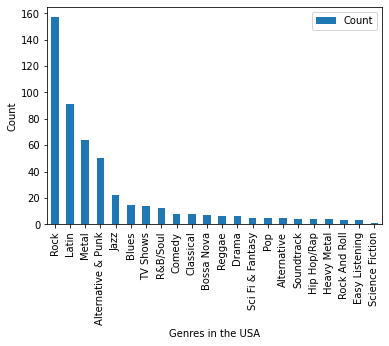

In [ ]:
ax = usa_genres.plot.bar('Name', 'count(Name)')
ax.legend(['Count'])
plt.xlabel('Genres in the USA')
plt.ylabel('Count')
plt.show()